In [1]:
# CSC 732
# Created by: Jessica Gallo
# Created: 2/12/2020
# Last modified: 2/15/2020
# Pattern Recognition & Neural Networks
# HW #1 Descriptive Statistics, Classification and Analysis Using Python & Python Libraries
# Part 3

In [2]:
# Listing 8

In [3]:
#Load Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#Load Dataset
filename = './Downloads/data_banknote_authentication.txt'
names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
dataSetCsv = pd.read_csv(filename,',',error_bad_lines=False, names=names)
dataset = pd.DataFrame(dataSetCsv)

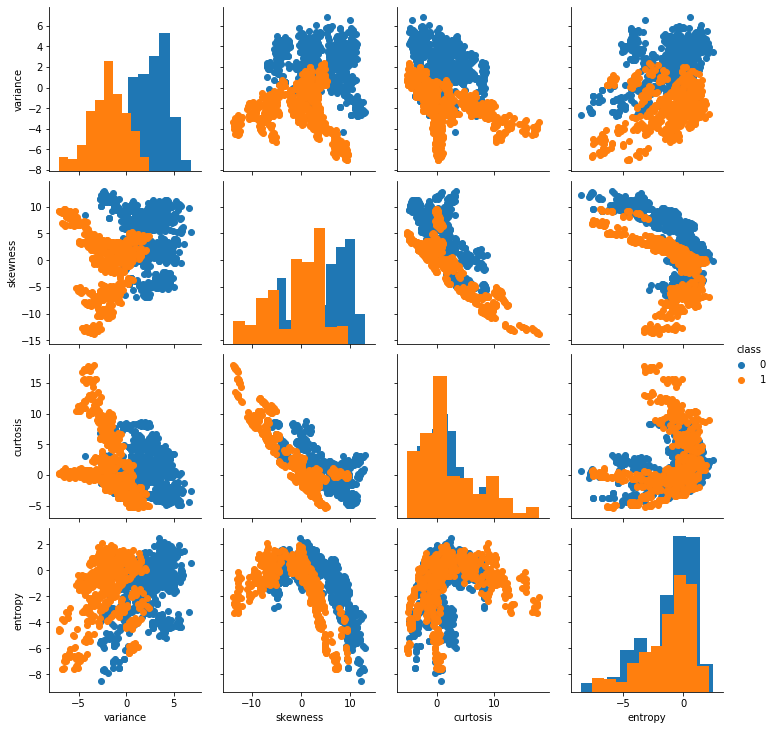

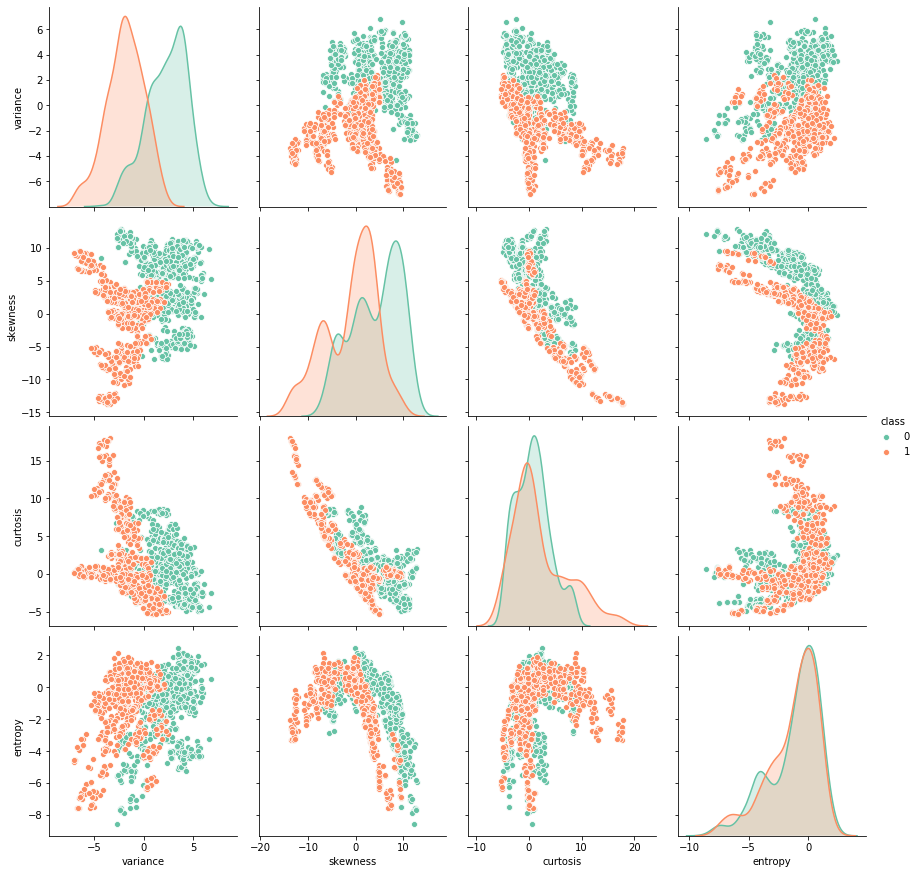

In [5]:
#-----------------
# Pair Grid plot  |
#-----------------
grph = sns.PairGrid(dataset, hue ="class")
grph.map_diag(plt.hist)
grph.map_offdiag(plt.scatter)
grph.add_legend()

# b. plotting a pairwise relationship with different color
grph = sns.pairplot(dataset, hue ="class", palette = "Set2", height = 3)

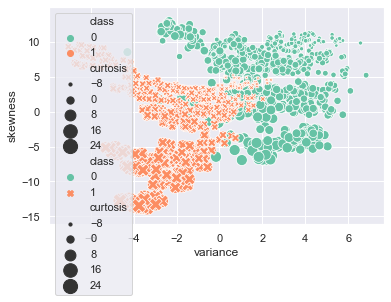

In [6]:
#---------------------------------------------
# Scatter Plot with continious hues and sizes |
#---------------------------------------------
sns.set()
ax = sns.scatterplot(x = "variance", y = "skewness", hue = "class", size = "curtosis", 
                     palette="Set2", sizes = (10,200), data = dataset)

sns.set()
ax= sns.scatterplot(x= "variance", y= "skewness", hue = "class", size = "curtosis", style = "class",
                    palette = "Set2", sizes = (10,200), data = dataset)

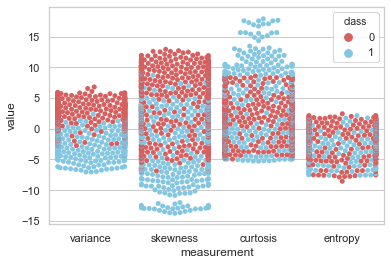

In [7]:
#------------------------
#Categorical scatterplot |
#------------------------

sns.set(style = "whitegrid", palette = "muted")

# "Melt" the dataset to "long-form" ot "tidy" representation
meltData = pd.melt(dataset, "class", var_name = "measurement")

# draw a categorical scatterplot to show each observation
sns.swarmplot(x = "measurement", y = "value", hue = "class",
              palette = ["r", "c"], data = meltData)

Text(3.8, 4.5, 'negative')

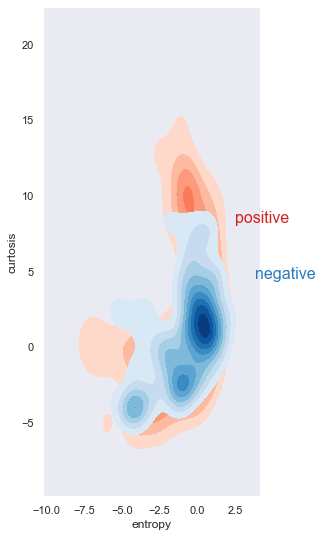

In [9]:
#------------------------------
# Multiple bivariate KDE plots |
#------------------------------
# converting data to dataframe
filename = './Downloads/data_banknote_authentication.txt'
names = ['variance', 'skewness', 'curtosis', 'entropy', 'classs']
dataSetCsv = pd.read_csv(filename,',',error_bad_lines=False, names=names)
dataset = pd.DataFrame(dataSetCsv)

sns.set(style="dark")

# subset the dataset by class
positive = dataset.query("classs == 1")
negative = dataset.query("classs == 0")


# set up the figure
f, ax = plt.subplots(figsize = (8,9))
ax.set_aspect("equal")

# draw two density plots

ax = sns.kdeplot(positive.entropy,  positive.curtosis, 
                 cmap = "Reds", shade = True, shade_lowest = False)

ax = sns.kdeplot(negative.entropy, negative.curtosis,
                 cmap = "Blues", shade = True, shade_lowest = False)

# add labels to the graph

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "positive", size = 16, color = red)
ax.text(3.8, 4.5, "negative", size = 16, color = blue)

'\n# improve the Legend\n handles, labels = ax.get_legend_handles_labels()\n ax.legend(handles[3:], labels[3:], title="class", \n           handletextpad = 0, columnspacing = 1, \n           loc = "lower right", ncol = 2, frameon = True)\n'

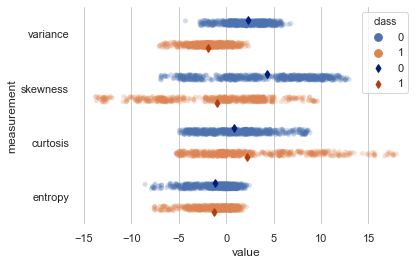

In [10]:
#-------------------------------------
# Conditional means with observations |
#-------------------------------------

sns.set(style = "whitegrid")

# using previous meltData

# initialize the figure

f, ax = plt.subplots()
sns.despine(bottom=True, left = True)

# show each observation with a scatter plot
sns.stripplot(x = "value", y = "measurement", hue = "class", 
              data = meltData, dodge = True, alpha = .25, zorder = 1)

# show the conditional means

sns.pointplot(x="value", y="measurement", hue = "class", 
              data = meltData, dodge = .532, join = False, palette = "dark",
              markers = "d", scale = .75, ci = None)

'''
# improve the Legend
 handles, labels = ax.get_legend_handles_labels()
 ax.legend(handles[3:], labels[3:], title="class", 
           handletextpad = 0, columnspacing = 1, 
           loc = "lower right", ncol = 2, frameon = True)
'''

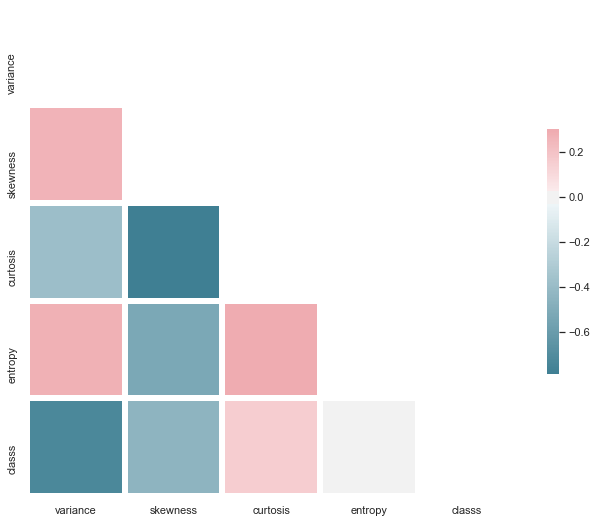

In [11]:
#-----------------------------
# Diagonal correlation matrix |
#-----------------------------

# import numpy
import numpy as np
sns.set(style = "white")

# compute the correlation matrix
corr = dataset.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# generating a colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)


# draw the heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3,
            center = 0, square = True, linewidth = 5, cbar_kws = {"shrink": .5})

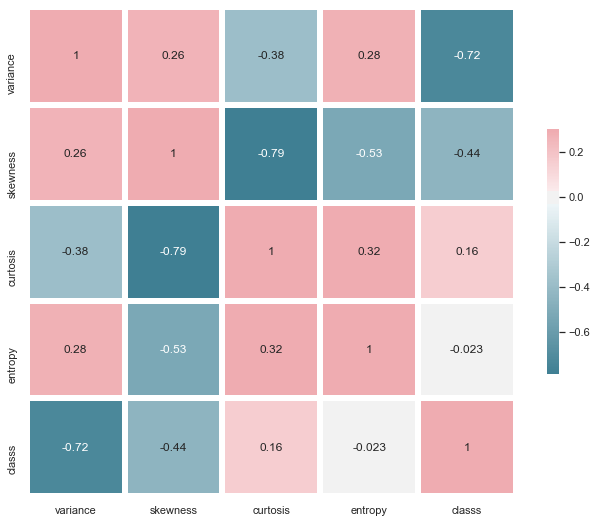

In [12]:
#--------------------
# Correlation matrix |
#--------------------

# import numpy
import numpy as np
sns.set(style = "white")

# compute the correlation matrix
corr = dataset.corr()

# set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# generating a colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)


# draw the heatmap
sns.heatmap(corr, mask = None, cmap = cmap, vmax = .3,
            center = 0, square = True, linewidth = 5, cbar_kws = {"shrink": .5}, annot = True )

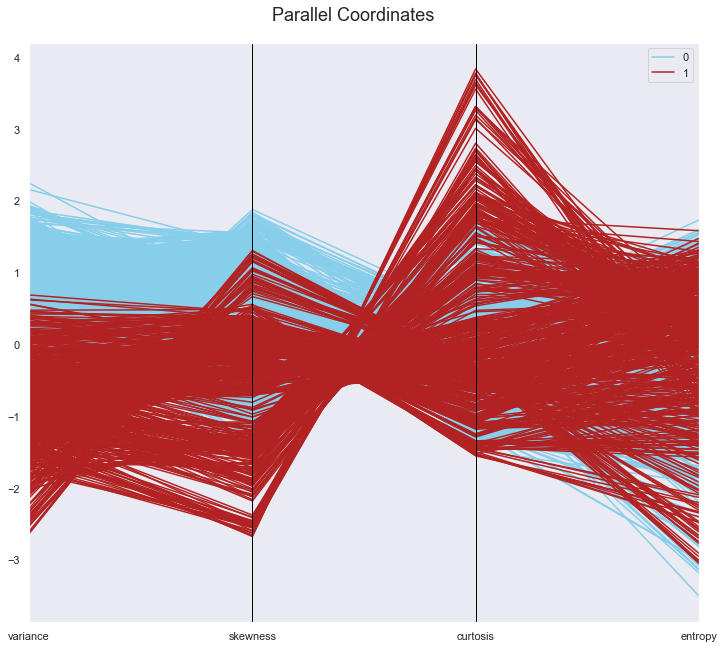

In [16]:
#----------------------------
# Parallel Coordinates Plots |
#----------------------------


'''
Before we proceed to run parallel_coordinates(),        
we'll need to scale our data first, as different        
attributes are measured on different scales.            
We'll be using StandardScaler in sklearn.preprocessing  
to do the job.
'''


# Attributes of interest
cols = ['variance', 'skewness', 'curtosis', 'entropy']
subset_df = dataset[cols]
#import sklearn preprocessing to rescale the data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, dataset['class']], axis=1)

# draw parralel coordinates
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(final_df, 'class', color=('skyblue', 'firebrick'))

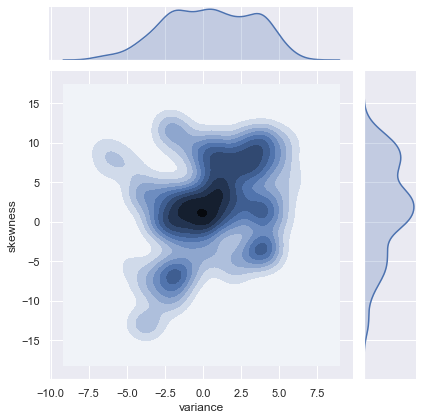

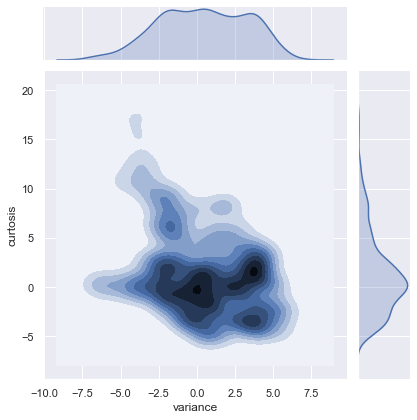

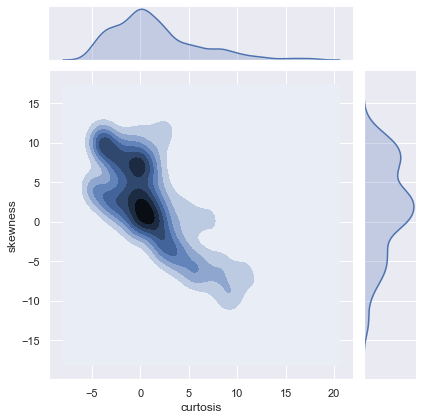

In [14]:
#-----------------------------------------
# Kernel Density Estimation with joinplot |
#-----------------------------------------
sns.set()
sns.jointplot(x="variance", y="skewness", data=dataset, kind="kde");

sns.jointplot(x="variance", y="curtosis", data=dataset, kind="kde");

sns.jointplot(x="curtosis", y="skewness", data=dataset, kind="kde");